# Suplementary Information figures for publication ExoPhot II 
Generation of figures for the second paper of the series dedicated to ExoPhot to be added to the suplementary information document.

### Load libraries 
Load libraries and functions

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.constants as const
import pandas as pd
import itertools
from os import walk
from pathlib import Path

### Define available cases to plot

In [2]:
theoretical_pigm = ['ChlA_tddft', 'BChlA_tddft', 'Phot0-Zn', 'Phot0-Mg']


### Choose colorblind color scheme

In [3]:
# https://gist.github.com/thriveth/8560036
CB_color_cycle = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']


### Define plot functions

In [4]:
def plot_pigment_extinction(wl, pigm_extinct, pigm_label, color, ax):
    """Helper function to plot molar extinction coeficient of theoretical pigments
    """
 
    
    ax.plot(wl, pigm_extinct, label=pigm_label, color=color)
    
    #ax.set_ylim(0,None)
    ax.set_xlim(2500,8000)

    #ax.autoscale(enable=True, axis='x', tight=True)
    ax.ticklabel_format(axis='y', style='sci', scilimits=(-1, 1), useOffset=False)
    ax.set_ylim(0,370000)
    ax.set_ylabel('$\epsilon_{abs}$ (M$^{-1}$ cm$^{-1}$)')
    ax.set_xlabel('Wavelength ($\AA$)')
    
    ax.legend(loc="upper right")




## Molar extinction coeficient 
The molar extinction coeficient ($\epsilon_{\rm abs}$) of the theoretical pigment is retrieved from the input folder. $\epsilon_{\rm abs}(\lambda)$ is in units of M$^{-1}$ cm$^{-1}$. 
 

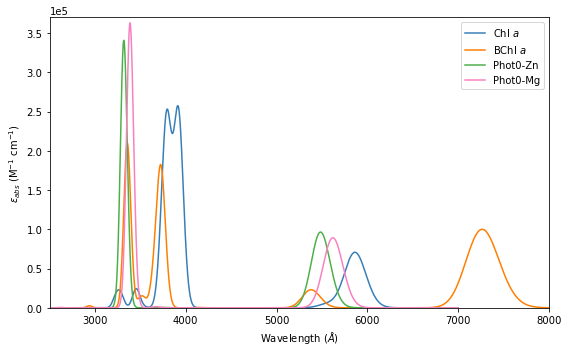

In [10]:


fig, ax = plt.subplots(1,1,figsize=(8,5))

#Set the input folder of the pigments molar extinction files
th_pigm_folder = "../input/theoric_pigments/" 

# pigment label for the plot
pigm_label = ['Chl $\it{a}$', 'BChl $\it{a}$', 'Phot0-Zn', 'Phot0-Mg']

iterator = 0
#Iterate in pigment's names
for pigm_name in theoretical_pigm:
    #2D array with pigment extinction coefficient spectrum [nm; M-1 cm-1]
    pigm_extinct_array = np.loadtxt(th_pigm_folder+pigm_name+'.txt',usecols=(0,1)) # [nm, M-1 cm-1]
    pigm_extinct_array = np.transpose(pigm_extinct_array)
    
    # from nm to Angstrom
    pigm_extinct_array[0] = 10*pigm_extinct_array[0]


    plot_pigment_extinction(pigm_extinct_array[0], pigm_extinct_array[1], pigm_label[iterator], CB_color_cycle[iterator], ax)
    iterator = iterator +1

plt.tight_layout()
plt.savefig('../output/figures/pigment_extinction_plot.pdf', dpi = 150)
plt.show()  